# Q2. You are playing a game with two other people, A and B. A can only randomly choose any integer from 0 to 100. B and you can choose any number. The person who chooses the highest number loses, and pays the other two people the number they (the winners) chose. What is your strategy?

'The person who chooses the highest number loses'

- The highest number A can choose is 100
- There is no upper limit for the number B can choose
- I assume I don't know A and B choses before I choose my number... But in case I know them, I would choose the maximum number below the maximum number of A and B, so I get more money.

- In case I choose a number above 100, say, 101, I will lose over A. But what if I choose 105 and B chooses 106? Then B loses, and pays 105 to me and whatever number A chose.

# Solution in the case I know A and B outcomes

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# possible outcomes 

A = np.random.randint(0,101) # random integer number in [0, 100]

B = 106 # B chosen number

me = max(A,B)-1

print(f'A: {A}\nB: {B}\nme: {me}')

A: 92
B: 106
me: 105


# Solution in case I don't know A and B outcome

In that case, let's suppose we play that game many times -> so I could use the central limit theorem to state that the expected outcome of A will be 

$\mu = \frac{100 + 0}{2} = 50$ 

with a variance

$\sigma^2 = \frac{1}{12}(100-0)^2 = 833$

so that 

$\sigma = 29$

just in case, we could make a simulation to be sure

mean = 49.79
variance = 856.65
std = 29.27
95% of A choses will be in the interval 96.0


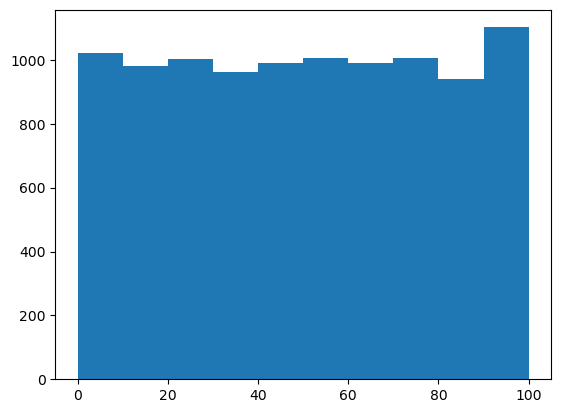

In [2]:
N = 10000

A = np.random.randint(low=0, high=101, size=N)

plt.hist(A)

print(f'mean = {np.round(np.mean(A),2)}')

print(f'variance = {np.round(np.var(A),2)}')

print(f'std = {np.round(np.std(A),2)}')

print(f'95% of A choses will be in the interval {np.percentile(A,95)}')

yes! it looks like a uniform distribution.

Let's simulate to corroborate our guess

In [3]:
upLIM = 101
N = 10000 # number of simulations
C = np.zeros((upLIM, N)) # vector to save my choices

for i in range(upLIM): # loop for the choice of B, A would be random each time
    for j in range(N): # loop for N games
        A = np.random.randint(0, upLIM) # A choses a random number between 0 and 100        
        C[i, j] = A-1 # this assumes I know previous outputs, and also maximizes my earnings

In [4]:
np.mean(C)

48.978813861386136

So, I would expect that A will chose a number above or equal to 50 most of the times. If I choose 49, I will win over A most of the times, as supported by previous simulation. But what about B, that could choose any number? If it is above 49, I don't mind, because I will always win. If it is below 49, I will win most of the times, given that A will choose a number above 49 most of the times (and for that reason, will lose most of the times). So my strategy would be to choose 49.

Assumptions:

- Any integer number in the [0, 100] range has the same probability to be chosen, i.e., 

$P(x) = \frac{1}{101}$ for any integer number in the [0,100] range

Let's make a simulation, for A it's easy, we've already seen how to do it. And for B, let's pick a number in between [0,100], and for each one, let's see what would our best choice be. At the end, we would have a statistical approach.

In [5]:
upLIM = 101
N = 10000 # number of simulations
C = np.zeros((upLIM, N)) # vector to save my wining choices

for i in range(upLIM): # loop for the choice of B, A would be random each time
    for j in range(N): # loop for N games
        A = np.random.randint(0, upLIM) # A choses a random number between 0 and 100
        B = i # B choses each number in the limit
        if max(A, B)>=1: # I cannot choose a negative number
            C[i, j] = max(A, B)-1 # this assumes I know both previous outputs, and also maximizes my earnings for every (A,B)

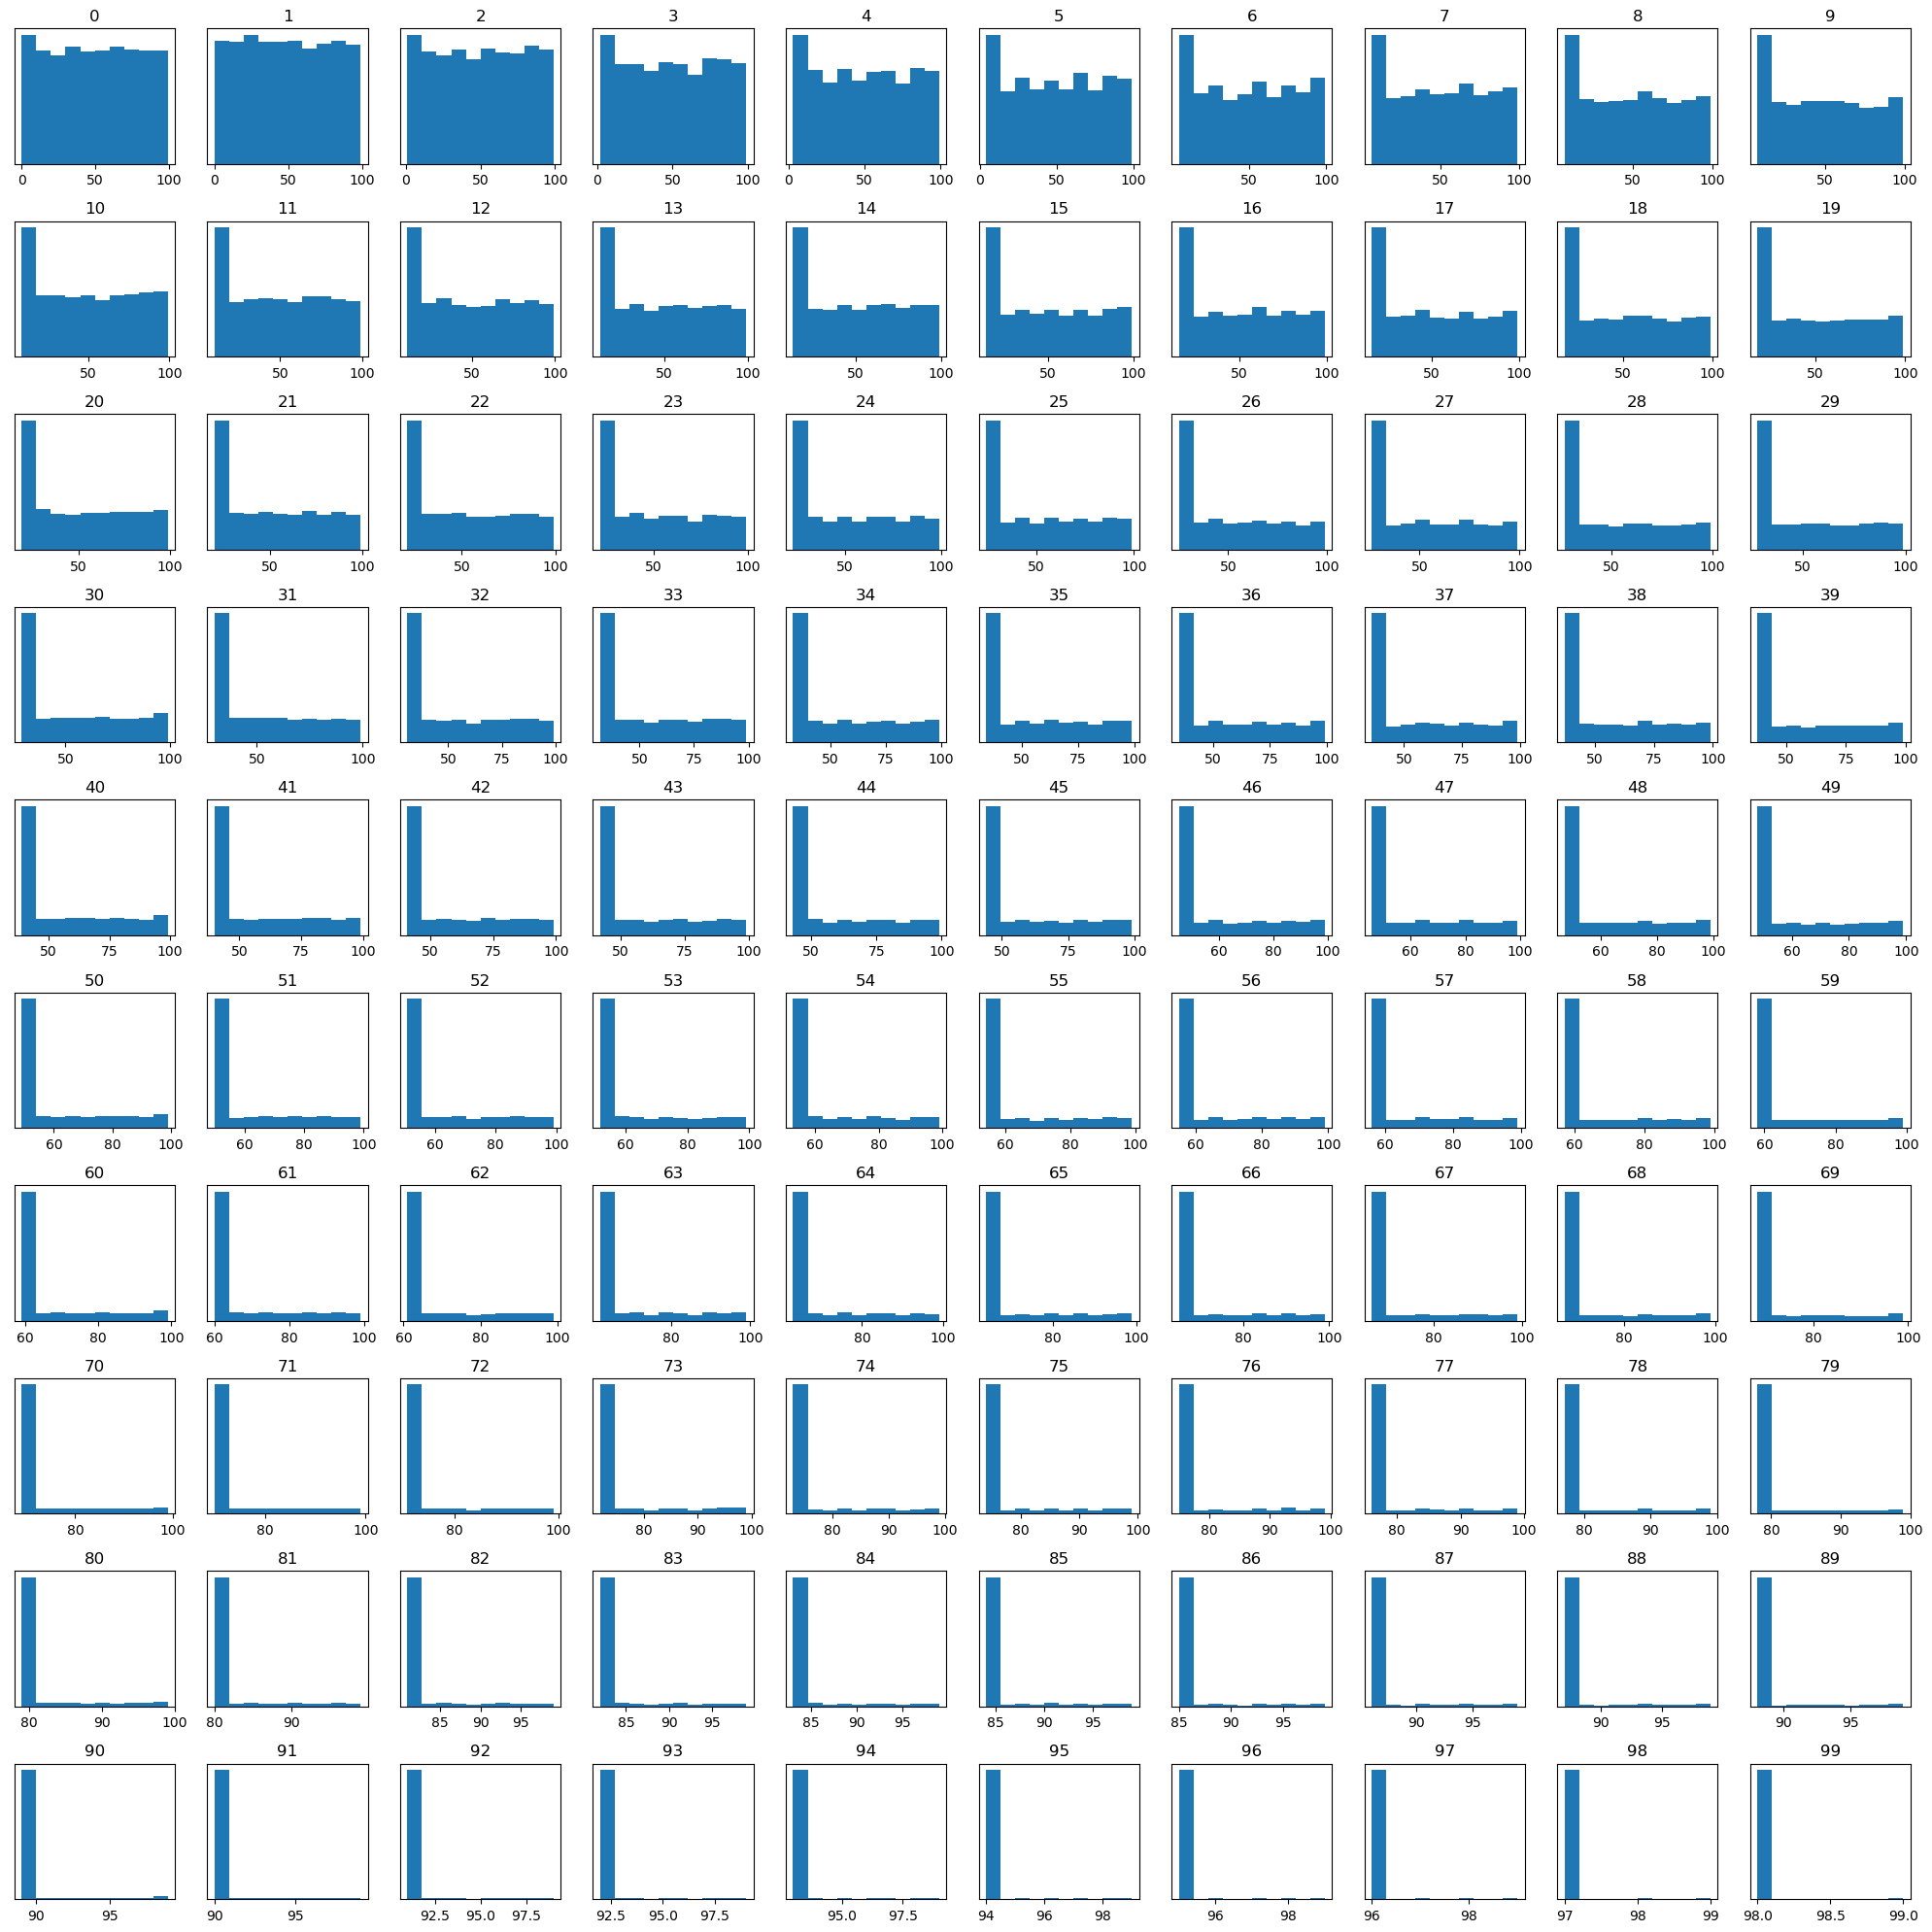

In [6]:
# let's take a look at C's distribution. The thing is, we will have a distribution for each B 
fig, axs = plt.subplots(10,10, figsize = (20,20))
ax = axs.flatten()
for i in range(0,100):
    ax[i].hist(C[i])
    ax[i].yaxis.set_visible(False)
    #ax[i].set_xlim(0,101)
    ax[i].set_title(f'{i}')
fig.tight_layout()

(array([ 11969.,  31586.,  51298.,  71578.,  91070., 111342., 130536.,
        150276., 170892., 189453.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

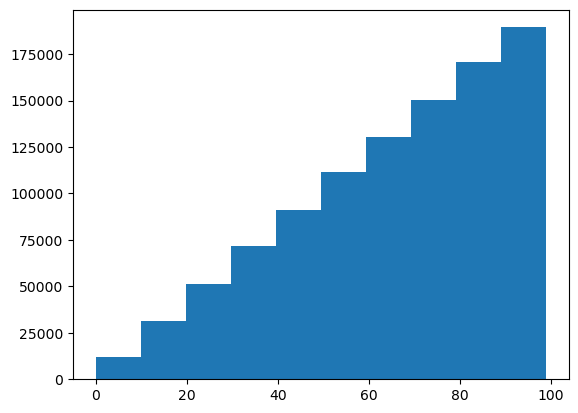

In [7]:
# what is the most frequent C?
plt.hist(C.flatten())

In [8]:
# what is the most frequent C?
np.argmax(C)
C.flatten()[np.argmax(C)]

99.0

99 is the most frequent given that if B chooses 100, it doesn't matter what number A choses, B will always loose, and 99 will maximize my earning for the N simulations. So 99 will be the best number if A choose 100..

In [9]:
# What's the mean of C? i.e., which I number should I choose in order to win most of the times, 
# no matter what number A choses
np.mean(C)

65.81938514851485

well, it looks like most of the times it is convenient to choose 66 in order to win... but it's not realistic, given that, for instance, B can choose 100 (and always loose, assuming we can also pick a number in the same range), and also that I know both outputs. Also, that gives me the most common winning number, but not necessarily the one that produces the maximum earnings. Now let's perform the simulation with our winings, for A choosing a RN btw [0,100], B picking a static number btw [0,100] and me also picking a static number btw [0,100]. After that, we'll see the picked number that has the maximum W

In [10]:
upLIM = 101
N = 1000 # number of simulations
#C = np.zeros((upLIM, upLIM, N)) # vector to save my choices
W = np.zeros(upLIM) #  to save my winnings/number
for i in range(upLIM): # loop for the choice of B, A would be random each time
    B = i # B choses each number in the limit
    for j in range(upLIM): # loop for my choices
        C = j # this assumes I don't know any previous output, and I choose a given number in the limit
        for k in range(N): # loop for N games
            A = np.random.randint(0, upLIM) # A choses a random number between 0 and 100
            if (C>B) and (C>A): # If I choose the biggest number, I pay the others their choices
                W[j] += -A-B
            if (C<B) or (C<A): # If there is any number bigger than mine, that player will pay me my chosen number
                W[j] += C

In [11]:
# Which number maximizes my earnings?
np.argmax(W)

43

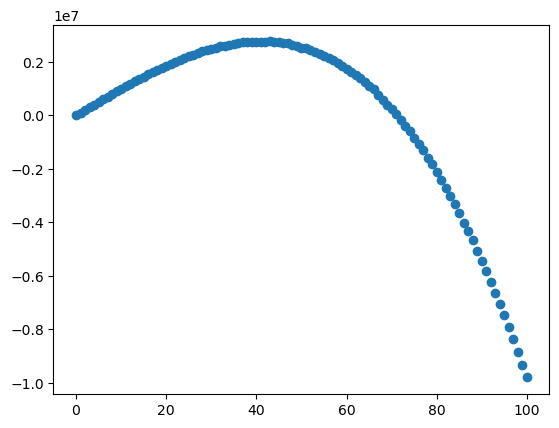

In [12]:
# Let's see the distribution of earning per chosen number
plt.scatter(np.arange(upLIM),W)

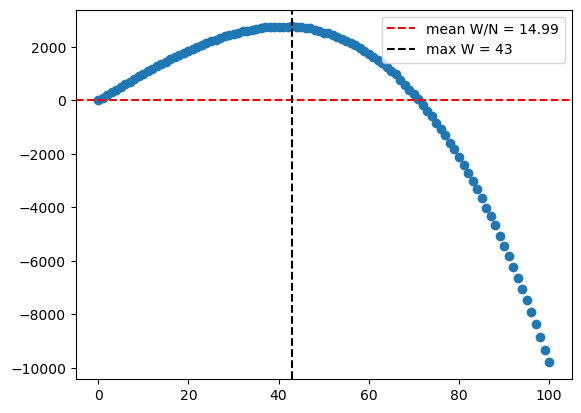

In [13]:
# Let's see the normalized distribution of earning per chosen number
plt.scatter(np.arange(upLIM),W/N)
plt.axhline(np.mean(W/N), linestyle='--', color='red', label='mean W/N = %.2f'%np.mean(W/N))
plt.axvline(np.argmax(W), linestyle='--',c='k', label=f'max W = {np.argmax(W)}')
plt.legend()

it looks as though choosing 41 will maximize earnings in the game, and I expect to win~19/game so that will be my strategy in case B is willing to choose numbers above 50... what if B only chooses numbers below 50, knowing that the expected value for A will be 50?

In [14]:
upLIMA = 101
upLIMB = 50
N = 1000 # number of simulations
#C = np.zeros((upLIM, upLIM, N)) # vector to save my choices
W = np.zeros(upLIMB) #  to save my winnings/number
for i in range(upLIMB): # loop for the choice of B, A would be random each time
    B = i # B choses each number in the limit
    for j in range(upLIMB): # loop for my choices, I won't choose any number above 50 either
        C = j # this assumes I don't know any previous output, and I choose a given number in the limit
        for k in range(N): # loop for N games
            A = np.random.randint(0, upLIMA) # A choses a random number between 0 and 100
            if C>B and C>A: # If I choose the biggest number, I pay the others their choices
                W[j] += -A-B
            if C<B or C<A: # If there is any number bigger than mine, that player will pay me my chosen number
                W[j] += C

In [15]:
# Which number maximizes my earnings?
np.argmax(W)

30

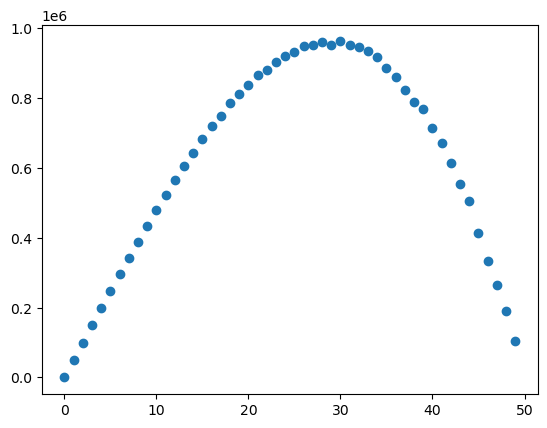

In [17]:
# Let's see the distribution of earning per chosen number
plt.scatter(np.arange(upLIMB),W)

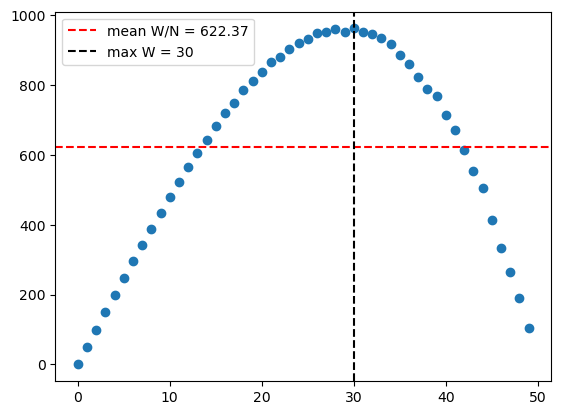

In [19]:
# Let's see the normalized distribution of earning per chosen number
plt.scatter(np.arange(upLIMB),W/N)
plt.axhline(np.mean(W/N), linestyle='--', color='red', label='mean W/N = %.2f'%np.mean(W/N))
plt.axvline(np.argmax(W), linestyle='--',c='k', label=f'max W = {np.argmax(W)}')
plt.legend()

It looks as though choosing 30 will maximize earnings in the game, and I expect them to be $622/game, so that will be my strategy in case B will choose numbers in the interval [0,49]... and what if B knows A's output, and picks just the number below that one, what then?

In [20]:
upLIM = 101
N = 1000 # number of simulations
#C = np.zeros((upLIM, upLIM, N)) # vector to save my choices
W = np.zeros(upLIM) #  to save my winnings/number
for i in range(upLIM): # loop for the choice of B, A would be random each time
    for j in range(upLIM): # loop for my choices
        C = j # this assumes I don't know any previous output, and I choose a given number in the limit
        for k in range(N): # loop for N games
            A = np.random.randint(0, upLIM) # A choses a random number between 0 and 100
            B = A-1 # B choses the upper number below A
            if C>B and C>A: # If I choose the biggest number, I pay the others their choices
                W[j] += -A-B
            if C<B or C<A: # If there is any number bigger than mine, that player will pay me my chosen number
                W[j] += C

In [21]:
# Which number maximizes my earnings?
np.argmax(W)

26

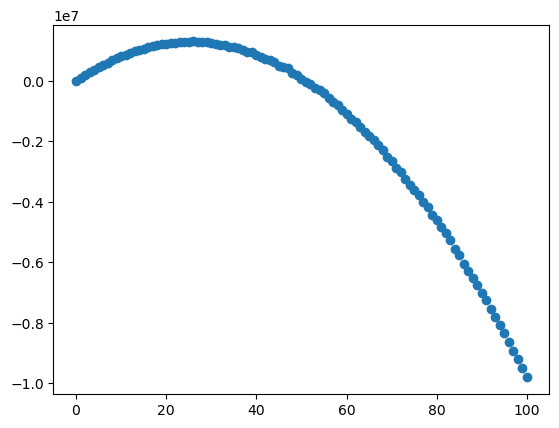

In [22]:
# Let's see the distribution of earning per chosen number
plt.scatter(np.arange(upLIM),W)

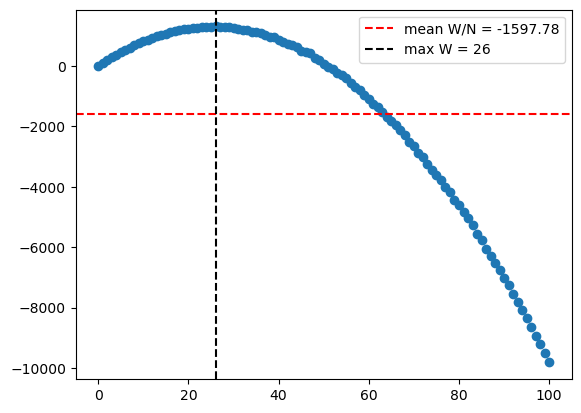

In [23]:
# Let's see the normalized distribution of earning per chosen number
plt.scatter(np.arange(upLIM),W/N)
plt.axhline(np.mean(W/N), linestyle='--', color='red', label='mean W/N = %.2f'%np.mean(W/N))
plt.axvline(np.argmax(W), linestyle='--',c='k', label=f'max W = {np.argmax(W)}')
plt.legend()

So, in case B knows A's choice and picks the highest number below that one, 25 will be the number that maximizes my earnings and that will be my strategy in that case... but I expect to loose most of the times this time.